## Imports

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('atussum_0321.csv')

In [3]:
df.head()

,TUCASEID,GEMETSTA,GTMETSTA,PEEDUCA,PEHSPNON,PTDTRACE,TEAGE,TELFS,TEMJOT,TESCHENR,...,t181801,t181899,t189999,t500101,t500103,t500104,t500105,t500106,t500107,t509989
0,20030100013280,1,-1,44,2,2,60,2,2,-1,...,0,0,0,0,0,0,0,0,0,0
1,20030100013344,2,-1,40,2,1,41,1,2,2,...,0,0,0,0,0,0,0,0,0,0
2,20030100013352,1,-1,41,2,1,26,2,2,2,...,0,0,0,0,0,0,0,0,0,0
3,20030100013848,2,-1,39,2,2,36,4,-1,2,...,0,0,0,0,0,0,0,0,0,0
4,20030100014165,2,-1,45,2,1,51,1,2,-1,...,0,0,0,0,0,0,0,0,0,0


In [6]:
codes = pd.read_excel('codes.xlsx')

In [7]:
codes

,TUCASEID,Case ID number code,Unnamed: 2,Unnamed: 3
0,GEMETSTA,Metropolitan status (1990 definitions),"(1 Metro, 2 Not-Metro, 3 not identified) - not...",NaN
1,GTMETSTA,Metropolitan status,"(1 Metro, 2 Not-Metro, 3 not identified)",NaN
2,PEEDUCA,Edited: what is the highest level of school yo...,see atuscpscodebk p 28,NaN
3,PEHSPNON,"Edited: are you Spanish, Hispanic, or Latino?","(1 Hispanic, 2=No)",NaN
4,PTDTRACE,Race (topcoded),see atuscpscodebk p 26,NaN
5,TEAGE,Age,NaN,NaN
6,TELFS,Tabor Force Status,NaN,"(see atusintcodebook p 19) 1-2=employed,3-4 un..."
7,TEMJOT,Edited: in the last seven days did you have mo...,NaN,NaN
8,TESCHENR,"Edited: are you enrolled in high school, colle...",NaN,NaN
9,TESCHLVL,"Edited: would that be high school, college, or...",NaN,NaN


In [8]:
v1 = df

In [9]:
major_cat = ['pca','ha', 'care_hh', 'care_nh', 'work', 'edu', 'con_pur', 'pro', 'house', 'gov', 'eat', 'soc', 'sport', 'rel', 'vol', 'call', 'travel']

## Clean the data, combining columns to major categories

In [10]:
v1['pca'] = v1[[col for col in v1.columns if col.startswith('t01')]].sum(axis=1)
v1['ha'] = v1[[col for col in v1.columns if col.startswith('t02')]].sum(axis=1)
v1['care_hh'] = v1[[col for col in v1.columns if col.startswith('t03')]].sum(axis=1)
v1['care_nh'] = v1[[col for col in v1.columns if col.startswith('t04')]].sum(axis=1)
v1['work'] = v1[[col for col in v1.columns if col.startswith('t05')]].sum(axis=1)
v1['edu'] = v1[[col for col in v1.columns if col.startswith('t06')]].sum(axis=1)
v1['con_pur'] = v1[[col for col in v1.columns if col.startswith('t07')]].sum(axis=1)
v1['pro'] = v1[[col for col in v1.columns if col.startswith('t08')]].sum(axis=1)
v1['house'] = v1[[col for col in v1.columns if col.startswith('t09')]].sum(axis=1)
v1['gov'] = v1[[col for col in v1.columns if col.startswith('t10')]].sum(axis=1)
v1['eat'] = v1[[col for col in v1.columns if col.startswith('t11')]].sum(axis=1)
v1['soc'] = v1[[col for col in v1.columns if col.startswith('t12')]].sum(axis=1)
v1['sport'] = v1[[col for col in v1.columns if col.startswith('t13')]].sum(axis=1)
v1['rel'] = v1[[col for col in v1.columns if col.startswith('t14')]].sum(axis=1)
v1['vol'] = v1[[col for col in v1.columns if col.startswith('t15')]].sum(axis=1)
v1['call'] = v1[[col for col in v1.columns if col.startswith('t16')]].sum(axis=1)
v1['travel'] = v1[[col for col in v1.columns if col.startswith('t18')]].sum(axis=1)


v1 = v1.drop(columns=[col for col in v1.columns if col.startswith('t0')])
v1 = v1.drop(columns=[col for col in v1.columns if col.startswith('t1')])
v1 = v1.drop(columns=["TUCASEID", "TUYEAR", "TU20FWGT", "TUFNWGTP", "TUDIARYDAY", "TRHOLIDAY"])
v1 = v1.drop(columns=[col for col in v1.columns if col.startswith('t5')])

In [11]:
v1.head()

,GEMETSTA,GTMETSTA,PEEDUCA,PEHSPNON,PTDTRACE,TEAGE,TELFS,TEMJOT,TESCHENR,TESCHLVL,...,pro,house,gov,eat,soc,sport,rel,vol,call,travel
0,1,-1,44,2,2,60,2,2,-1,-1,...,0,0,0,5,325,200,0,0,0,0
1,2,-1,40,2,1,41,1,2,2,-1,...,0,0,0,90,590,0,0,0,0,20
2,1,-1,41,2,1,26,2,2,2,-1,...,0,0,0,75,340,0,0,0,60,10
3,2,-1,39,2,2,36,4,-1,2,-1,...,0,0,0,25,265,0,0,0,0,0
4,2,-1,45,2,1,51,1,2,-1,-1,...,15,0,0,92,60,60,0,0,0,78


## Translate

In [85]:
f = open('translate.txt', 'r')
file_contents = f.read()
print (file_contents)
f.close()

'pca' = Personal Care
'ha' = Household Activities
'care_hh' = Caring For & Helping Household Members
'care_nh' = Caring For & Helping NonHH Members
'work' = Work & Work-Related Activities
'edu' = Education
'con_pur' = Consumer Purchases
'pro' = Professional & Personal Care Services
'house' = Household Services
'gov' = Government Services & Civic Obligations
'eat' = Eating and Drinking
'soc' = Socializing, Relaxing, and Leisure
'sport'= Sports, Exercise, and Recreation
'rel' = Religious and Spiritual Activities
'vol' = Volunteer Activities
'call' = Telephone Calls
'travel' = Traveling


## Let the machine learning commence...

In [13]:
X = v1.iloc[:, :19]

In [14]:
Y = v1.iloc[:,19:]

In [15]:
# normalize the times by dividing by total minutes in a day
Y = Y.div(1440, axis=0)

In [16]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [20]:
models = ['pca', 'ha', 'care_hh', 'care_nh', 'work', 'edu', 'con_pur', 'pro', 'house', 'gov', 'eat', 'soc', 'sport', 'rel', 'vol', 'call', 'travel']

In [23]:
from sklearn.model_selection import GridSearchCV
# Grid Search for Algorithm Tuning
search = []
for i in models:
    param_grid = {"max_depth":    [4, 5],
                "n_estimators": [500, 600, 700],
                "learning_rate": [0.01, 0.015]}
    regressor=XGBRegressor(eval_metric='rmsle', tree_method="gpu_hist")
    search.append(GridSearchCV(regressor, param_grid, cv=5).fit(X_train, y_train[i]))
    print(i)
    # print("The best hyperparameters are ",search.best_params_)


pca
ha
care_hh
care_nh
work
edu
con_pur
pro
house
gov
eat
soc
sport
rel
vol
call
travel


In [24]:
# creating models
c=0
for i in models:
    model = XGBRegressor(learning_rate = search[c].best_params_["learning_rate"],
                           n_estimators  = search[c].best_params_["n_estimators"],
                           max_depth     = search[c].best_params_["max_depth"],tree_method="gpu_hist")
    model.fit(X_train, y_train[i])
    model.save_model("models\\model-" + i + str(c) + ".txt")
    c += 1

In [27]:
from sklearn.metrics import r2_score
c = 0
for i in models:
    model = XGBRegressor(tree_method="gpu_hist")
    model.load_model("models\\model-" + i + str(c) + ".txt")
    y_pred = model.predict(X_test)
    accuracy = r2_score(y_test[i], y_pred)
    print(accuracy)
    c += 1

0.0761926737354709
0.10709676027242376
0.4090798642897703
0.011407506190077354
0.33268257878805474
0.34912183443059963
0.019191711327014582
0.005998205251215527
0.0005508350034488796
-0.003745379563704354
0.055036241836823985
0.2310520349278259
0.036803690990041216
0.028196059034009013
0.01297422005670601
0.04138812985921192
0.03773495766795687


In [28]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from numpy import absolute

In [29]:
c = 0
for i in models:
    model = XGBRegressor(tree_method="gpu_hist")
    model.load_model("models\\model-" + i + str(c) + ".txt")
    y_pred = model.predict(X_test)
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X_train, y_train[i], scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    scores = absolute(scores)
    print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )
    c += 1

Mean MAE: 0.069 (0.001)
Mean MAE: 0.068 (0.000)
Mean MAE: 0.019 (0.000)
Mean MAE: 0.012 (0.000)
Mean MAE: 0.099 (0.001)
Mean MAE: 0.012 (0.000)
Mean MAE: 0.023 (0.000)
Mean MAE: 0.006 (0.000)
Mean MAE: 0.001 (0.000)
Mean MAE: 0.000 (0.000)
Mean MAE: 0.025 (0.000)
Mean MAE: 0.102 (0.001)
Mean MAE: 0.021 (0.000)
Mean MAE: 0.015 (0.000)
Mean MAE: 0.012 (0.000)
Mean MAE: 0.008 (0.000)
Mean MAE: 0.035 (0.000)


## Viz

In [48]:
means = [0.069, 0.068, 0.019, 0.012, 0.099, 0.012, 0.023, 0.006, 0.001, 0.000, 0.025, 0.10, 0.021, 0.015, 0.012, 0.008]
stds = [0.001, 0.000, 0.000, 0.000, 0.001, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.001, 0.000, 0.000, 0.000, 0.000]
 

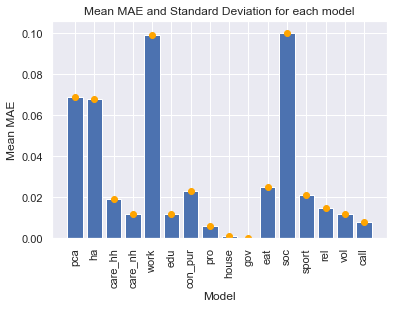

In [63]:
sns.set(style="darkgrid")
rng = range(0, 16)

plt.bar(rng, means)
plt.errorbar(rng, means, yerr=stds,fmt ='o', color='orange')
plt.title('Mean MAE and Standard Deviation for each model')
plt.ylabel('Mean MAE')
plt.xlabel('Model')
plt.xticks(rng, models[:16], rotation=90)
plt.show()


In [66]:
# plot y test
# overlap with x test output

c=0
for i in models:
    model = XGBRegressor(tree_method="gpu_hist")
    model.load_model("models\\model-" + i + str(c) + ".txt")
    y_pred = model.predict(X_test)

    # plt.xlim(right=)

    sns.set(style="darkgrid")
    sns.kdeplot(y_test[i],shade=True) # goes to 5

    sns.kdeplot(y_pred,shade=True)
    ymin, ymax = plt.ylim()
    plt.vlines(np.mean(y_test[i]), 0, ymax, color='orange')
    plt.vlines(np.mean(y_pred), 0, ymax, color='blue')
    plt.title('Distribution of Original data vs Predicited for Activity:' + i)
    plt.legend(['true distribution', 'model prediction'])
    plt.savefig("pred_distribution\\" + i + ".png")

    plt.clf()

    c+=1


<Figure size 432x288 with 0 Axes>

In [67]:
male = X_test.index[X_test['TESEX'] == 1].tolist()
female = X_test.index[X_test['TESEX'] == 2].tolist()

In [80]:
c=0
for i in models:
    model = XGBRegressor(tree_method="gpu_hist")
    model.load_model("models\\model-" + i + str(c) + ".txt")
    y_pred = model.predict(X_test.loc[male])

    sns.set(style="darkgrid")
    sns.kdeplot(y_test.loc[male][i],shade=True) # goes to 5

    sns.kdeplot(y_pred,shade=True)
    ymin, ymax = plt.ylim()
    plt.vlines(np.mean(y_test.loc[male][i]), 0, ymax, color='orange')
    plt.vlines(np.mean(y_pred), 0, ymax, color='blue')
    plt.title('Male Distribution of Original data vs Predicited for Activity: ' + i)
    plt.legend(['true distribution', 'model prediction'])
    plt.savefig("male_dist\\" + i + ".png")
    plt.clf()

    c+=1

<Figure size 432x288 with 0 Axes>

In [81]:
c=0
for i in models:
    model = XGBRegressor(tree_method="gpu_hist")
    model.load_model("models\\model-" + i + str(c) + ".txt")
    y_pred = model.predict(X_test.loc[female])

    sns.set(style="darkgrid")
    sns.kdeplot(y_test.loc[female][i],shade=True) # goes to 5

    sns.kdeplot(y_pred,shade=True)
    ymin, ymax = plt.ylim()
    plt.vlines(np.mean(y_test.loc[female][i]), 0, ymax, color='orange')
    plt.vlines(np.mean(y_pred), 0, ymax, color='blue')
    plt.title('Female Distribution of Original data vs Predicited for Activity: ' + i)
    plt.legend(['true distribution', 'model prediction'])
    plt.savefig("female_dist\\" + i + ".png")
    plt.clf()

    c+=1

<Figure size 432x288 with 0 Axes>

### Can pick which columns to look at

In [82]:
fulltime = X_test.index[X_test['TRDPFTPT'] == 1].tolist()
parttime = X_test.index[X_test['TRDPFTPT'] == 2].tolist()

In [83]:
c=0
for i in models:
    model = XGBRegressor(tree_method="gpu_hist")
    model.load_model("models\\model-" + i + str(c) + ".txt")
    y_pred = model.predict(X_test.loc[fulltime])

    sns.set(style="darkgrid")
    sns.kdeplot(y_test.loc[fulltime][i],shade=True) # goes to 5

    sns.kdeplot(y_pred,shade=True)
    ymin, ymax = plt.ylim()
    plt.vlines(np.mean(y_test.loc[fulltime][i]), 0, ymax, color='orange')
    plt.vlines(np.mean(y_pred), 0, ymax, color='blue')
    plt.title('Fulltime Distribution of Original data vs Predicited for Activity: ' + i)
    plt.legend(['true distribution', 'model prediction'])
    plt.savefig("fulltime_dist\\" + i + ".png")
    plt.clf()

    c+=1

<Figure size 432x288 with 0 Axes>

In [84]:
c=0
for i in models:
    model = XGBRegressor(tree_method="gpu_hist")
    model.load_model("models\\model-" + i + str(c) + ".txt")
    y_pred = model.predict(X_test.loc[parttime])

    sns.set(style="darkgrid")
    sns.kdeplot(y_test.loc[parttime][i],shade=True) # goes to 5

    sns.kdeplot(y_pred,shade=True)
    ymin, ymax = plt.ylim()
    plt.vlines(np.mean(y_test.loc[parttime][i]), 0, ymax, color='orange')
    plt.vlines(np.mean(y_pred), 0, ymax, color='blue')
    plt.title('Parttime Distribution of Original data vs Predicited for Activity: ' + i)
    plt.legend(['true distribution', 'model prediction'])
    plt.savefig("parttime_dist\\" + i + ".png")
    plt.clf()

    c+=1

<Figure size 432x288 with 0 Axes>